# TEST TECHNIQUE EQUANCY

### Importations

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/data.csv')
data = df.copy()
data

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,"1,5",Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17,Rennes


1) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs 
manquantes ?

In [3]:
print("Nb valeurs manquantes : ", data.isnull().sum().sum())
data.isna().sum()

Nb valeurs manquantes :  130


Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

<font color='blue'>Il y a 9582 observations et 130 valeurs manquantes</font> 

2) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" 
avec : 

1.   la valeur médiane pour les data scientists
2.   la valeur moyenne pour les data engineers

In [4]:
data['Experience'] = data['Experience'].str.replace(',', '.', regex=False).apply(pd.to_numeric)

In [5]:
mean = data['Experience'].mean()
median = data['Experience'].median()
print(mean)
print(median)

2.8141863406408096
2.0


In [6]:
data['Experience'].mask((data['Metier'] == 'Data scientist') & (data['Experience'].isna()) , mean, inplace=True)
data['Experience'].mask((data['Metier'] == 'Data engineer') & (data['Experience'].isna()) , median, inplace=True)

3) Combien d'années d'expériences ont, en moyenne, chacun des profils : le 
data scientist, le lead data scientist et le data engineer en moyenne ?

In [7]:
data.groupby(['Metier']).mean()

,Experience
Metier,
Data architecte,3.000476
Data engineer,2.976566
Data scientist,2.248009
Lead data scientist,3.965261


4) Faire la représentation graphique de votre choix afin de comparer le 
nombre moyen d'années d'expériences pour chaque métier

In [8]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Experience'][data['Metier']=='Data architecte'], name='Data architecte',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=data['Experience'][data['Metier']=='Data engineer'], name = 'Data engineer',
                marker_color = 'lightseagreen'))

fig.add_trace(go.Box(y=data['Experience'][data['Metier']=='Data scientist'], name = 'Data scientist',
                marker_color = 'royalblue'))

fig.add_trace(go.Box(y=data['Experience'][data['Metier']=='Lead data scientist'], name = 'Lead data scientist',
                marker_color = 'darkgoldenrod'))

moyennes = data.groupby(['Metier']).mean()['Experience']
fig.add_trace(go.Scatter(x=["Data architecte", "Data engineer", "Data scientist", "Lead data scientist"], y=moyennes, 
                         name='mean', mode='lines+markers+text', text=[str(round(m,2)) for m in moyennes], textposition='bottom center', 
                         textfont_size=14, marker_color='mediumorchid'))

fig.update_layout(title_text='Boxplot of year of experience and mean for each jobs', yaxis_title="Experience")
fig.show()

5) Transformer la variable continue 'Experience' en une nouvelle variable 
catégorielle 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert. 
Veuillez expliquer votre choix de la règle de transformation.

In [9]:
Exp_label=pd.cut(data.Experience, [0,2.5, 4,7.5,25],labels=["debutant","confirme","avance", "expert"], right=False)
data["Exp_label"]=Exp_label
data

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.000000,Paris,debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.000000,Marseille,confirme
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.000000,Nantes,confirme
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.500000,Marseille,debutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.814186,Bordeaux,confirme
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.500000,Lyon,debutant
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.000000,Toulouse,expert
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.000000,Paris,debutant
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.000000,Rennes,expert


6) Quelles sont les 5 technologies les plus utilisées ? Faites un graphique

In [10]:
techno = []

for tech in data.Technologies.tolist():
  t = tech.split("/")

  for i in t:
    techno.append(i)

techno = pd.Series(techno)

In [11]:
import plotly.express as px

fig = px.histogram(x=techno.value_counts().index[:10], y=techno.value_counts().tolist()[:10])
fig.update_layout(title = "Nombre d'occurences des technologies", yaxis_title="Nombre d'occurences", xaxis_title="Technologies", bargap=0.1)

fig.show()

<font color='blue'>Les 5 technologies les plus utilisées sont Python, R, SQL, Java, Hadoop</font> 

7) Réaliser une méthode de clustering non supervisée de votre choix pour faire 
apparaître le nombre de clusters que vous jugerez pertinents. Donnez les 
caractéristiques de chacun des clusters.


1.   Justifier le nombre de clusters 
2.   Justifier la performance de votre algorithme grâce à une métrique.
3.   Interpréter votre résultat

### <font color='blue'>Preprocess data</font>

In [12]:
clust_data = data.copy()
for tech in techno.value_counts().index[:31]:
  if tech!='':
    clust_data[tech] = np.where(clust_data["Technologies"].str.contains(tech, regex=False), 1, 0)

clust_data.dropna(inplace=True)
clust_data.drop(columns=['Experience', 'Technologies'], inplace=True)

In [13]:
clust_data = pd.get_dummies(clust_data, columns=['Entreprise','Metier', 'Diplome', 'Ville', 'Exp_label'] )

In [14]:
clust_data.head()

,Python,R,SQL,Java,Hadoop,Excel,C++,Spark,Linux,MongoDB,...,Ville_Paris,Ville_Rennes,Ville_Rouen,Ville_Strasbourg,Ville_Toulon,Ville_Toulouse,Exp_label_debutant,Exp_label_confirme,Exp_label_avance,Exp_label_expert
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0



### <font color='blue'>Choix du nombre de clusters</font>

In [15]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(1,5)

for k in K_range: 
  model = KMeans(n_clusters = k).fit(clust_data)
  inertia.append(model.inertia_)

Text(0, 0.5, 'Coût')

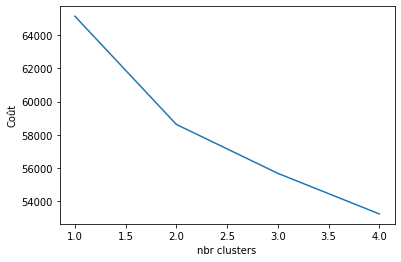

In [16]:
plt.plot(K_range, inertia)
plt.xlabel('nbr clusters')
plt.ylabel('Coût')

<font color='blue'>On choisit donc 2 clusters</font>


### <font color='blue'>Performance du modèle</font>

In [17]:
model = KMeans(n_clusters = 2).fit(clust_data)
print(model.inertia_)

58622.501902151795


In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

metrics.silhouette_score(clust_data, model.labels_, metric='euclidean')

0.09966658211516419

### <font color='blue'>Interprétation des résultats</font>

In [19]:
np.unique(model.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([4447, 5057]))

In [20]:
data_labelled = data.copy()
for tech in techno.value_counts().index[:31]:
  if tech!='':
    data_labelled[tech] = np.where(data_labelled["Technologies"].str.contains(tech, regex=False), 1, 0)

data_labelled.dropna(inplace=True)

In [21]:
data_labelled['Label'] = model.predict(clust_data)

In [22]:
import plotly.express as px

fig = px.histogram(data_labelled, y="Exp_label", color="Label")
fig.show()

In [23]:
import plotly.express as px

fig = px.histogram(data_labelled, y="Ville", color="Label")
fig.show()

In [24]:
import plotly.express as px

fig = px.histogram(data_labelled, y="Metier", color="Label")
fig.show()

In [25]:
import plotly.express as px

fig = px.histogram(data_labelled, x="Diplome", color="Label")
fig.show()

In [26]:
import plotly.express as px

fig = px.histogram(data_labelled, x="Python" , color="Label")
fig.show()

In [27]:
import plotly.express as px

fig = px.histogram(data_labelled, x="R" , color="Label")
fig.show()

In [28]:
import plotly.express as px

fig = px.histogram(data_labelled, x="SQL" , color="Label")
fig.show()

In [29]:
import plotly.express as px

fig = px.histogram(data_labelled, x="Java" , color="Label")
fig.show()

In [30]:
import plotly.express as px

fig = px.histogram(data_labelled, x="Hadoop" , color="Label")
fig.show()

<font color='blue'>Cette clusterisation en 2 clusters permet d'identifier principalement 2 catégories de métiers (Data Scientists et Data architecte/engineer)</font>

8) Réaliser la prédiction des métiers manquants dans la base de données par 
l'algorithme de votre choix
1. Justifier la performance de votre algorithme grâce à une métrique.
2. Interpréter votre résultat.

### <font color='blue'>Preprocess data</font>

<font color='blue'>Droping all na values, droping entreprise column, transform categorical columns as dummy</font>

In [31]:
tmp = data.dropna()
X = tmp[["Technologies", "Diplome", "Ville", "Exp_label", 'Experience']]
y = tmp["Metier"]

In [32]:
for tech in techno.value_counts().index[:31]:
  if tech!='':
    X[tech] = np.where(X["Technologies"].str.contains(tech, regex=False), 1, 0)

X.dropna(inplace=True)
X.drop(columns=['Experience', 'Technologies'], inplace=True)
X = pd.get_dummies(X, columns=[ 'Diplome', 'Ville', 'Exp_label'] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<font color='blue'>Spliting into train and test set</font>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

<font color='blue'>Training a classifier</font>

In [34]:
#from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)

print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Train Accuracy: 0.9263468013468014
Test Accuracy: 0.8552188552188552


In [35]:
print(classification_report(y_train, clf.predict(X_train)))

                     precision    recall  f1-score   support

    Data architecte       0.97      0.97      0.97      1584
      Data engineer       0.98      0.99      0.99      1756
     Data scientist       0.95      0.88      0.92      2873
Lead data scientist       0.72      0.86      0.78       915

           accuracy                           0.93      7128
          macro avg       0.90      0.93      0.91      7128
       weighted avg       0.93      0.93      0.93      7128



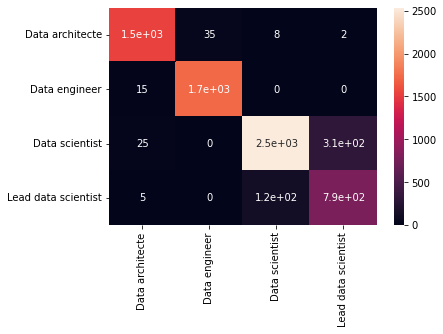

In [36]:
import seaborn as sns
classes = ['Data architecte','Data engineer','Data scientist', 'Lead data scientist']
sns.heatmap(confusion_matrix(y_train, clf.predict(X_train)) , annot=True, xticklabels=classes, yticklabels=classes)

<font color='blue'>Interpreting prediction</font>

In [37]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

    Data architecte       0.94      0.94      0.94       512
      Data engineer       0.96      0.99      0.97       587
     Data scientist       0.87      0.82      0.84       987
Lead data scientist       0.50      0.57      0.53       290

           accuracy                           0.86      2376
          macro avg       0.82      0.83      0.82      2376
       weighted avg       0.86      0.86      0.86      2376



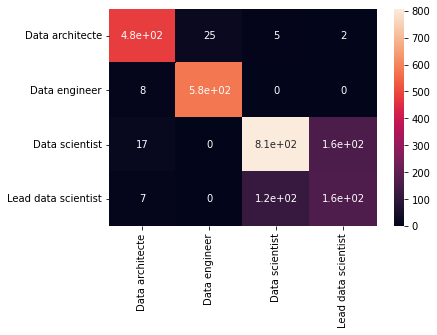

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True, xticklabels=classes, yticklabels=classes)

<font color='blue'>Trying to build a classifier to separate data scientist and lead data scientist</font>

In [39]:
from sklearn.tree import DecisionTreeClassifier

tmp = data.dropna()
tmp = tmp[tmp['Metier'].str.contains('scientist')]
X = tmp[["Technologies", "Diplome", "Ville", "Exp_label", 'Experience']]
y = tmp["Metier"]

for tech in techno.value_counts().index[:31]:
  if tech!='':
    X[tech] = np.where(X["Technologies"].str.contains(tech, regex=False), 1, 0)

X.dropna(inplace=True)
X.drop(columns=['Experience','Technologies'], inplace=True)
X = pd.get_dummies(X, columns=['Diplome', 'Ville', 'Exp_label'] )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clfbis = DecisionTreeClassifier(random_state=0, max_depth=6)

clfbis.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DecisionTreeClassifier(max_depth=6, random_state=0)

In [40]:
print("Train Accuracy:", clfbis.score(X_train, y_train))
print("Test Accuracy:", clfbis.score(X_test, y_test))

Train Accuracy: 0.820218096080165
Test Accuracy: 0.8205741626794258


In [41]:
print(classification_report(y_test, clfbis.predict(X_test)))

                     precision    recall  f1-score   support

     Data scientist       0.84      0.94      0.89      1293
Lead data scientist       0.68      0.40      0.50       379

           accuracy                           0.82      1672
          macro avg       0.76      0.67      0.70      1672
       weighted avg       0.81      0.82      0.80      1672



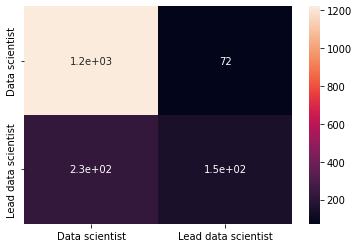

In [42]:
import seaborn as sns
classes = ['Data scientist', 'Lead data scientist']
sns.heatmap(confusion_matrix(y_test, clfbis.predict(X_test)) , annot=True, xticklabels=classes, yticklabels=classes)

<font color='blue'>Visualizing the tree</font>

In [43]:
from sklearn import tree
#tree.plot_tree(clf)
tree.export_graphviz(clfbis, out_file='tree.dot', class_names=['Data scientist', 'Lead data scientist'], feature_names=X_test.columns)

In [44]:
!dot -Tpng /content/tree.dot -o /content/tree.png

<font color='blue'>Making the predictions of na value</font>

In [45]:
tmp = data.copy()
X = tmp[["Technologies", "Diplome", "Ville", "Exp_label", 'Experience', 'Metier']]

In [46]:
for tech in techno.value_counts().index[:31]:
  if tech!='':
    X[tech] = np.where(X["Technologies"].str.contains(tech, regex=False), 1, 0)

X.drop(columns=['Experience', 'Technologies'], inplace=True)
X = pd.get_dummies(X, columns=[ 'Diplome', 'Ville', 'Exp_label'] )
X = X[X['Metier'].isna()]
X.drop(columns=['Metier'], inplace=True)
X

,Python,R,SQL,Java,Hadoop,Excel,C++,Spark,Linux,MongoDB,...,Ville_Paris,Ville_Rennes,Ville_Rouen,Ville_Strasbourg,Ville_Toulon,Ville_Toulouse,Exp_label_debutant,Exp_label_confirme,Exp_label_avance,Exp_label_expert
346,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2058,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2670,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2899,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3346,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4248,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4290,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4292,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5425,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5593,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
tmp = data[data['Metier'].isna()]
tmp['Pred_job'] = clf.predict(X)
tmp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Pred_job
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,confirme,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,expert,Data scientist
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,debutant,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,debutant,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,avance,Data architecte
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,debutant,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,debutant,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,expert,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,avance,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,confirme,Data scientist


<font color='blue'>The results show pretty much the same thing as the result seen during testing, the model seems to perform well to identify data engineer, data architecte and data scientist but struggles to differentiate data scientist and lead data scientist. One of the reason could be the under representation of lead data scientist in the dataset</font>